# Описание задачи
«Набор данных о поведении клиентов и покупках в электронной коммерции» — это синтетический набор данных, созданный с использованием библиотеки Faker Python. Он моделирует комплексную среду электронной коммерции, фиксируя различные аспекты поведения клиентов и историю покупок на цифровом рынке. Этот набор данных подходит для таких задач, как прогнозирование оттока клиентов, анализ потребительской корзины, системы рекомендаций и анализ тенденций.

Задача прогнозирования состоит в том, чтобы определить с чем может быть взаимосвязан отток клиентов.

In [54]:
import sklearn # для машинного обучения
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd # таблицы и временные ряды
%matplotlib inline
import seaborn as sns # красивая графика

data = pd.read_csv("/kaggle/input/e-commerce-customer-for-behavior-analysis/ecommerce_customer_data_large.csv")
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [55]:
type(data)

pandas.core.frame.DataFrame

In [56]:
data.shape

(250000, 13)

250000 строк, 13 столбцов

In [57]:
data.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [58]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [59]:
data.tail()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0
249999,4148,2020-09-07 05:12:19,Home,307,5,3634,Cash,32,0.0,Angela Norton,32,Male,0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


#  Описание столбцов

* Customer ID: идентификатор клиента.
* Purchase Date: дата покупки, совершенной покупателем.
* Product Category: тип приобретенного товара.
* Product Price: цена приобретенного товара.
* Quantity: количество приобретенного товара.
* Total Purchase Amount: общая сумма покупки.
* Payment Method : способ оплаты, используемый клиентом.
* Customer Age: возраст клиента (генерируется Faker).
* Returns: возвратил ли клиент какие-либо продукты (двоичный код: 0 — возврат невозвратный, 1 — возврат).
* Customer Name: имя клиента.
* Age: возвраст клиента.
* Gender: пол клиента.
* Churn: двоичный столбец, показывающий, ушел ли клиент (0 — клиент остался, 1 — клиент ушёл).

Признаки Returns и Churn - бинарные.

Признаки Gender, Product Category, Payment Method - категориальные.

Признаки Customer ID, Product Price, Quantity, Total Purchase Amount, Customer Age, Age - числовые.

Заменим тип категориальных признаков. Уберем столбец "Customer Age", так как он дублирует "Age", а также столбцы "Customer Name" и "Customer ID".

Заменим тип данных у даты (из строчного типа в дату). 

In [61]:
data['Product Category'] = data['Product Category'].astype('category')
data['Payment Method'] = data['Payment Method'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data = data.drop(['Customer Name','Customer Age','Customer ID'], axis=1)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Purchase Date          250000 non-null  datetime64[ns]
 1   Product Category       250000 non-null  category      
 2   Product Price          250000 non-null  int64         
 3   Quantity               250000 non-null  int64         
 4   Total Purchase Amount  250000 non-null  int64         
 5   Payment Method         250000 non-null  category      
 6   Returns                202618 non-null  float64       
 7   Age                    250000 non-null  int64         
 8   Gender                 250000 non-null  category      
 9   Churn                  250000 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int64(5)
memory usage: 14.1 MB


Посмотрим баланс Churn:

In [62]:
balance_percentage = data['Churn'].value_counts(normalize=True) * 100

print(balance_percentage)

Churn
0    79.948
1    20.052
Name: proportion, dtype: float64


В процентном соотношении нулей больше в 4 раза. То есть 80% покупателей остаются.

Информация о количественных признаках:

In [63]:
data.describe()

,Purchase Date,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,250000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,2021-11-06 19:26:22.286192384,254.742724,3.004936,2725.385196,0.500824,43.798276,0.20052
min,2020-01-01 00:07:26,10.000000,1.000000,100.000000,0.000000,18.000000,0.00000
25%,2020-12-03 08:10:12,132.000000,2.000000,1476.000000,0.000000,30.000000,0.00000
50%,2021-11-06 07:39:08.500000,255.000000,3.000000,2725.000000,1.000000,44.000000,0.00000
75%,2022-10-11 01:21:56.249999872,377.000000,4.000000,3975.000000,1.000000,57.000000,0.00000
max,2023-09-13 18:42:49,500.000000,5.000000,5350.000000,1.000000,70.000000,1.00000
std,NaN,141.738104,1.414737,1442.576095,0.500001,15.364915,0.40039


min – минимальное значение признака

max – максимальное значение признака

mean – среднее значение

std – среднеквадратическое отклонение

25% – первый квартиль – значение, ниже которого лежит 25% значений

50% – медиана – значение, 50% значений меньше которого, а другие 50% больше

75% – третий квартиль – значение, ниже которого лежит около 75% значений

Можно немного проанализировать таблицу: Отток в большинстве случаев принимает значение 0(большинство клиентов остаются)
    
Средний возраст - 44

Средняя сумма покупки - 2725

Построим матрицу корреляции для количественных признаков:

In [64]:
corr_mat = data.corr(numeric_only=True)
corr_mat

,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
Product Price,1.000000,0.002339,-0.001297,0.004029,0.002214,0.001181
Quantity,0.002339,1.000000,0.001234,0.001128,-0.000180,-0.001352
Total Purchase Amount,-0.001297,0.001234,1.000000,0.001018,0.056552,0.000706
Returns,0.004029,0.001128,0.001018,1.000000,-0.001619,-0.004078
Age,0.002214,-0.000180,0.056552,-0.001619,1.000000,-0.002299
Churn,0.001181,-0.001352,0.000706,-0.004078,-0.002299,1.000000


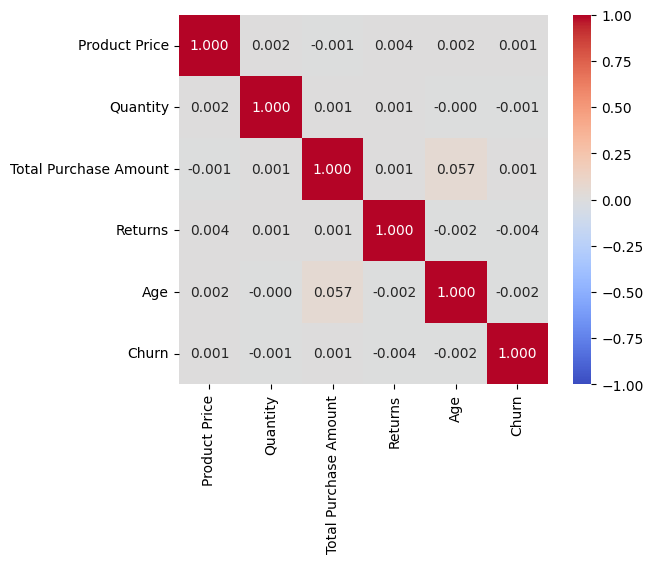

In [65]:
sns.heatmap(corr_mat, square=True, vmin = -1, vmax = 1, annot = True, fmt='.3f', cmap = 'coolwarm')
pass

Есть небольшая корреляция возраста и общей суммы покупки.

Информация о категориальных признаках:

In [66]:
data.describe(include=["category"])

,Product Category,Payment Method,Gender
count,250000,250000,250000
unique,4,3,2
top,Electronics,Credit Card,Male
freq,62630,83547,125676


unique - это количество уникальных значений в признаке

top - это наиболее распространенное значение

freq - это частота наиболее распространенного значения

Наиболее широко покупают электронику, по сравнению с другими товарами. 

Оплата в большинстве случаев происходит с помощью карты.

Большинство покупателей - мужчины.

Посмотрим есть ли пропущенные значения:

In [67]:
data.isnull()

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Age,Gender,Churn
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,True,False,False,False
249998,False,False,False,False,False,False,False,False,False,False


In [68]:
data.isnull().sum()

Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Age                          0
Gender                       0
Churn                        0
dtype: int64

19% пропущенных значений есть в Returns.

# Визуализация данных

Визуализируем отток:

<Axes: xlabel='Churn', ylabel='count'>

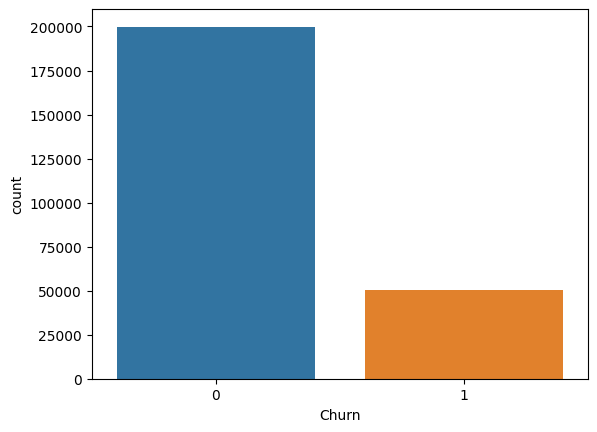

In [69]:
sns.countplot(x="Churn",data=data)

Изобразим все диаграммы рассеивания:

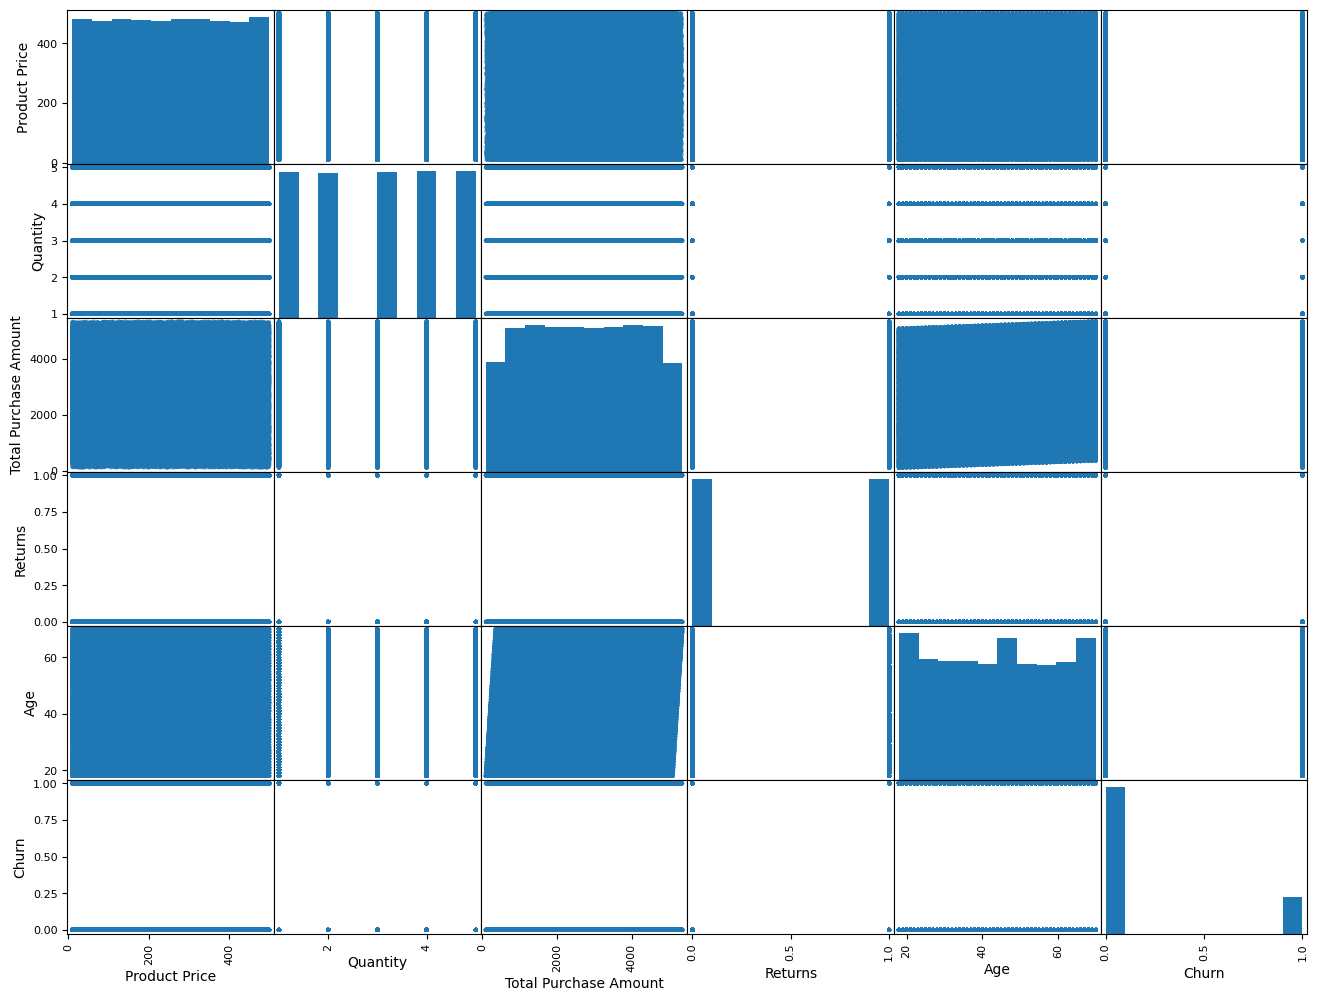

In [70]:
pd.plotting.scatter_matrix(data,figsize=(16,12))
pass

Изобразим гистограммы:

array([[<Axes: title={'center': 'Purchase Date'}>,
        <Axes: title={'center': 'Product Price'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'Total Purchase Amount'}>,
        <Axes: title={'center': 'Returns'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

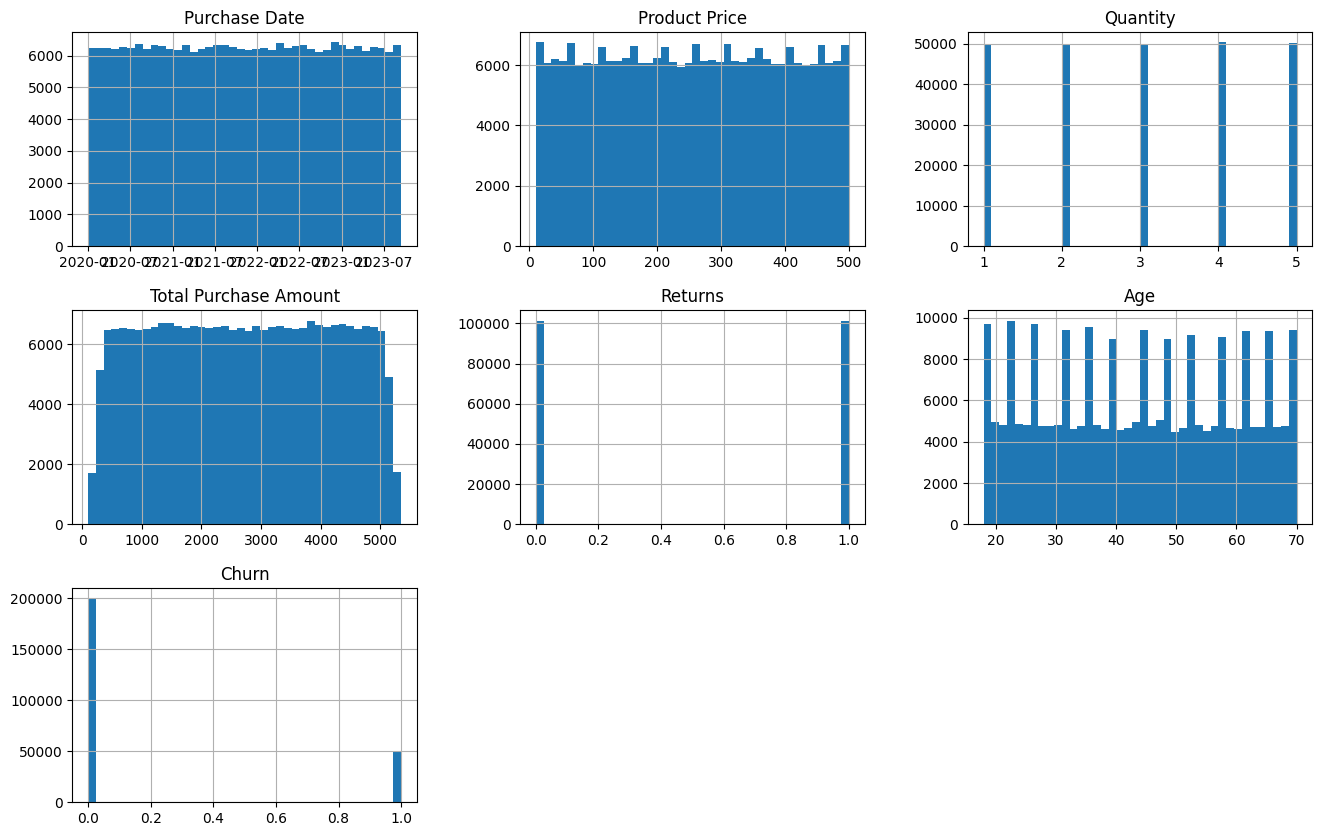

In [71]:
data.hist(bins=40, layout=(3,3), figsize=(16,10))

# Заполнение пропущенных значений

In [72]:
data.isna().sum()

Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Returns                  47382
Age                          0
Gender                       0
Churn                        0
dtype: int64

Заполним средним значением пропуски.

In [73]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy="median")
imp_num.fit(data[['Returns']])

SimpleImputer(strategy='median')

In [74]:
data[['Returns']] = imp_num.transform(data[['Returns']])

In [75]:
data.isna().sum()

Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Returns                  0
Age                      0
Gender                   0
Churn                    0
dtype: int64

# Бинаризация номинальных признаков

Применим метод бинаризации(one-hot encoding) к Product Category, Gender и Payment Method. (Бинаризация заключается в разбиении столбца на несколько бинарных столбцов )

In [76]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(data[['Product Category', 'Gender', 'Payment Method']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [77]:
dummies = pd.DataFrame(enc.transform(data[['Product Category', 'Gender', 'Payment Method']]), columns=enc.get_feature_names_out(),index=data.index)
dummies

,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Gender_Male,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
249995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
249996,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
249997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
249998,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


Добавим новые столбцы и удалим старые:

In [78]:
data = pd.concat((data,dummies),axis=1).drop(['Product Category', 'Gender', 'Payment Method'],axis=1)

In [79]:
data

,Purchase Date,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Gender_Male,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal
0,2023-05-03 21:30:02,177,1,2427,1.0,31,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2021-05-16 13:57:44,174,3,2448,1.0,31,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2020-07-13 06:16:57,413,1,2345,1.0,31,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2023-01-17 13:14:36,396,3,937,0.0,31,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2021-05-01 11:29:27,259,4,2598,1.0,31,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,436,1,3664,0.0,63,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
249996,2021-06-04 05:45:25,233,1,4374,1.0,66,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
249997,2022-11-10 17:11:57,441,5,5296,1.0,63,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
249998,2021-06-27 14:42:12,44,2,2517,1.0,64,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# Масштабирование количественных признаков

Способы масштабирования:

* Стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

* Нормализация - приведение данных к единичной норме.

* Приведение к отрезку [0;1] - линейное преобразование, приводящее все значения к заданному отрезку.

In [80]:
cols = ['Product Price','Quantity','Total Purchase Amount','Age']
data_numerical = data[cols]
data_numerical.describe()

,Product Price,Quantity,Total Purchase Amount,Age
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,254.742724,3.004936,2725.385196,43.798276
std,141.738104,1.414737,1442.576095,15.364915
min,10.000000,1.000000,100.000000,18.000000
25%,132.000000,2.000000,1476.000000,30.000000
50%,255.000000,3.000000,2725.000000,44.000000
75%,377.000000,4.000000,3975.000000,57.000000
max,500.000000,5.000000,5350.000000,70.000000


Приведем эти столбцы к отрезку от 0 до 1.

In [81]:
data_numerical = (data_numerical - data_numerical.min(axis = 0))/(data_numerical.max(axis = 0) - data_numerical.min(axis = 0))
data_numerical

,Product Price,Quantity,Total Purchase Amount,Age
0,0.340816,0.00,0.443238,0.250000
1,0.334694,0.50,0.447238,0.250000
2,0.822449,0.00,0.427619,0.250000
3,0.787755,0.50,0.159429,0.250000
4,0.508163,0.75,0.475810,0.250000
...,...,...,...,...
249995,0.869388,0.00,0.678857,0.865385
249996,0.455102,0.00,0.814095,0.923077
249997,0.879592,1.00,0.989714,0.865385
249998,0.069388,0.25,0.460381,0.884615


In [82]:
data = data.drop(['Product Price','Quantity','Total Purchase Amount','Age'],axis=1)
data = pd.concat((data,data_numerical),axis=1)
data

,Purchase Date,Returns,Churn,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Gender_Male,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Product Price,Quantity,Total Purchase Amount,Age
0,2023-05-03 21:30:02,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.340816,0.00,0.443238,0.250000
1,2021-05-16 13:57:44,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.334694,0.50,0.447238,0.250000
2,2020-07-13 06:16:57,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.822449,0.00,0.427619,0.250000
3,2023-01-17 13:14:36,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.787755,0.50,0.159429,0.250000
4,2021-05-01 11:29:27,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.508163,0.75,0.475810,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2023-01-24 12:32:18,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.869388,0.00,0.678857,0.865385
249996,2021-06-04 05:45:25,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.455102,0.00,0.814095,0.923077
249997,2022-11-10 17:11:57,1.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.879592,1.00,0.989714,0.865385
249998,2021-06-27 14:42:12,1.0,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.069388,0.25,0.460381,0.884615


# Обучающая и тестовая выборки

Разобьем на обучающую,валидационную и тестовую выборки(60% данных для обучения, 15% для валидации и 25% для тестирования).

In [83]:
from sklearn.model_selection import train_test_split

y = data['Churn']
data = data.drop(columns=['Churn',"Purchase Date"])
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25, random_state = 56)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)

N_train, _ = X_train.shape
N_val, _ = X_val.shape
N_test,  _ = X_test.shape

N_train, N_val, N_test       #количество строк в обучающей, валидационной и тестовой выборках

(150000, 37500, 62500)

Посмотрим в каждой ли выборке есть оба значения(1,0):

In [84]:
y_train.describe()

count    150000.000000
mean          0.200193
std           0.400146
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Churn, dtype: float64

In [85]:
y_val.describe()

count    37500.000000
mean         0.200027
std          0.400025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64

In [86]:
y_test.describe()

count    62500.000000
mean         0.201600
std          0.401198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64

## Основные методы классов, реализующих алгоритмы машинного обучения

Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:


fit(X_train, y_train) - обучение (тренировка) модели на обучающей выборке X_train, y_train

predict(X) - предсказание на данных X

set_params(**params) - установка параметров алгоритма

get_params() - чтение параметров алгоритма

Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода set_params(**params).

#### Воспользуемся классификатором k ближайших соседей(kNN)

Рассмотрим несколько k вручную для дальнейшего сравнения валидации после подбора гиперпараметра.

Пусть k=4

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

Ошибка на тренировочной выборке:

In [89]:
err_train

0.18476

In [90]:
y_val_predict = knn.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict)

Ошибка на валидационной выборке:

In [91]:
err_val

0.21712

Пусть k=10

In [92]:


knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [93]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

Ошибка на тренировочной выборке:

In [94]:
err_train

0.19859333333333334

In [95]:
y_val_predict = knn.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict)

Ошибка на валидационной выборке:

In [96]:
err_val

0.20408

Пусть k=20

In [97]:
knn = KNeighborsClassifier(n_neighbors = 20)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [98]:
y_train_predict = knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [99]:
err_train

0.20004666666666668

In [100]:
y_val_predict = knn.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict)

In [101]:
err_val

0.20058666666666666

Матрица рассогласования для kNN на валидации:

(строки - истинные значения, столбцы - предсказанные)



In [102]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_val_predict))

[[29975    24]
 [ 7498     3]]


### Подбор гиперпараметров:

In [103]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 10, 15, 20, 25, 35, 40, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.20019333333333333 40


In [104]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_knn)

print(err_train, err_val)

0.20019333333333333 0.20002666666666666


После подбора гиперпараметра видно, что ошибка валидации примерно равна значениям трех предыдущих ошибок(при k=4, 10, 20). 

In [105]:

print(confusion_matrix(y_val, y_val_predict_knn))

[[29999     0]
 [ 7501     0]]


Видно, что единицы предсказываются плохо из-за несбалансированности. На валидационной выборке он все значения отнес к нулю, хотя единиц на самом деле 7501.

Посмотрим метрики. 

Precision показывает долю правильно предсказанных примеров данного класса из всех примеров, которые модель отнесла к этому классу. Высокая точность означает, что модель почти не делает ложных срабатываний для данного класса.

Recall показывает долю правильно предсказанных примеров данного класса из всех истинных примеров этого класса. Высокая полнота означает, что модель хорошо находит примеры данного класса и не упускает их.

F1-score — это гармоническое среднее между precision (точностью) и recall (полнотой). Эта метрика особенно полезна при несбалансированных данных, так как учитывает как ложные срабатывания (FP), так и пропущенные объекты (FN) для каждого класса. F1-score — идеальная метрика, когда важен баланс между precision и recall, особенно в задачах, где ошибочное предсказание в меньшем классе критично (например, при выявлении мошенничества, диагностики заболеваний, детекции дефектов).

Support показывает, сколько раз каждый класс появляется в истинных метках и служит ориентиром для интерпретации других метрик.

In [106]:
from sklearn.metrics import classification_report

# Выводим precision, recall и F1-score для каждого класса
print(classification_report(y_val, y_val_predict_knn))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     29999
           1       0.00      0.00      0.00      7501

    accuracy                           0.80     37500
   macro avg       0.40      0.50      0.44     37500
weighted avg       0.64      0.80      0.71     37500



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Создадим таблицу для сохранения результатов ошибок.

In [107]:
table = pd.DataFrame(columns=("train","valid"))
table.loc["kNN",:]=(err_train,err_val)

In [108]:
table

,train,valid
kNN,0.200193,0.200027


#### Классификатор случайный лес

Рассмотрим несколько параметров

Пусть параметр равен 500

In [109]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_val  = np.mean(y_val  != rf.predict(X_val))

print(err_train, err_val)

6.666666666666667e-06 0.20877333333333334


In [110]:
table.loc["Random Forest(500)",:]=(err_train,err_val)

In [111]:
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773


Значимость признаков:

In [112]:
np.sum(rf.feature_importances_)

1.0

In [113]:
importances = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
importances

Total Purchase Amount           0.351480
Product Price                   0.330660
Age                             0.204731
Quantity                        0.056186
Returns                         0.013491
Gender_Male                     0.012895
Product Category_Home           0.005023
Product Category_Clothing       0.004863
Product Category_Books          0.004863
Product Category_Electronics    0.004465
Payment Method_PayPal           0.004090
Payment Method_Cash             0.003919
Payment Method_Credit Card      0.003333
dtype: float64

Пусть параметр равен 1000

In [114]:

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf1000 = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf1000)

print(err_train, err_val)

6.666666666666667e-06 0.20858666666666667


In [115]:
print(confusion_matrix(y_val, y_val_predict_rf1000))

[[29578   421]
 [ 7401   100]]


Здесь модель уже хотя бы предсказывает единицу, но, в целом, результат предсказания плохой. Так как слишком много единиц отнесены к нулю.

In [116]:
print(classification_report(y_val, y_val_predict_rf1000))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     29999
           1       0.19      0.01      0.02      7501

    accuracy                           0.79     37500
   macro avg       0.50      0.50      0.45     37500
weighted avg       0.68      0.79      0.71     37500



In [117]:
table.loc["Random Forest(1000)",:]=(err_train,err_val)

In [118]:
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773
Random Forest(1000),0.000007,0.208587


Пусть параметр равен 150

In [119]:
rf = ensemble.RandomForestClassifier(n_estimators = 150)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)

6.666666666666667e-06 0.20904


In [120]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[29551   448]
 [ 7391   110]]


In [121]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     29999
           1       0.20      0.01      0.03      7501

    accuracy                           0.79     37500
   macro avg       0.50      0.50      0.46     37500
weighted avg       0.68      0.79      0.71     37500



In [122]:
table.loc["Random Forest(150)",:]=(err_train,err_val)

In [123]:
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773
Random Forest(1000),0.000007,0.208587
Random Forest(150),0.000007,0.20904


Попробуем подобрать параметры поменьше, чтобы не было переобучения на train. max_depth ограничит глубину каждого дерева, предотвращая излишнюю детализацию.

In [124]:
rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=2)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf100 = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf100)

print(err_train, err_val)

0.20019333333333333 0.20002666666666666


In [125]:
table.loc["Random Forest(100, 5, 5)",:]=(err_train,err_val)

In [126]:
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773
Random Forest(1000),0.000007,0.208587
Random Forest(150),0.000007,0.20904
"Random Forest(100, 5, 5)",0.200193,0.200027


In [127]:
print(confusion_matrix(y_val, y_val_predict_rf100))

[[29999     0]
 [ 7501     0]]


Результат такой же, как и у kNN.

### Попробуем побороться с несбалансированностью.

Сначала попробуем сделать балансировку случайного леса. class_weight='balanced_subsample' подстраивает веса классов на уровне отдельных деревьев, снижая переобучение.

Рассмотрим для 100, 300 и для 1000:

In [128]:
rf = ensemble.RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)

2e-05 0.20853333333333332


In [129]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[29582   417]
 [ 7403    98]]


In [130]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     29999
           1       0.19      0.01      0.02      7501

    accuracy                           0.79     37500
   macro avg       0.50      0.50      0.45     37500
weighted avg       0.68      0.79      0.71     37500



In [131]:
rf = ensemble.RandomForestClassifier(n_estimators=300, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)

6.666666666666667e-06 0.20784


In [132]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[29614   385]
 [ 7409    92]]


In [133]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     29999
           1       0.19      0.01      0.02      7501

    accuracy                           0.79     37500
   macro avg       0.50      0.50      0.45     37500
weighted avg       0.68      0.79      0.71     37500



In [134]:
rf = ensemble.RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)


6.666666666666667e-06 0.20714666666666667


In [135]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[29638   361]
 [ 7407    94]]


In [136]:

print(classification_report(y_val, y_val_predict_rf))


              precision    recall  f1-score   support

           0       0.80      0.99      0.88     29999
           1       0.21      0.01      0.02      7501

    accuracy                           0.79     37500
   macro avg       0.50      0.50      0.45     37500
weighted avg       0.68      0.79      0.71     37500



In [137]:
table.loc["Random Forest(1000, balace)",:]=(err_train,err_val)
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773
Random Forest(1000),0.000007,0.208587
Random Forest(150),0.000007,0.20904
"Random Forest(100, 5, 5)",0.200193,0.200027
"Random Forest(1000, balace)",0.000007,0.207147


Также можно попробовать взять совсем малые параметры:

In [138]:
rf = ensemble.RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)

0.02946 0.21810666666666667


In [139]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[29111   888]
 [ 7291   210]]


In [140]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     29999
           1       0.19      0.03      0.05      7501

    accuracy                           0.78     37500
   macro avg       0.50      0.50      0.46     37500
weighted avg       0.68      0.78      0.71     37500



In [141]:
rf = ensemble.RandomForestClassifier(n_estimators=3, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_val_predict_rf = rf.predict(X_val)
err_val  = np.mean(y_val  != y_val_predict_rf)

print(err_train, err_val)

0.058 0.2706133333333333


In [142]:
print(confusion_matrix(y_val, y_val_predict_rf))

[[26447  3552]
 [ 6596   905]]


In [143]:
print(classification_report(y_val, y_val_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     29999
           1       0.20      0.12      0.15      7501

    accuracy                           0.73     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       0.68      0.73      0.70     37500



Судя по метрикам, данный алгоритм лидирует по балансу предсказанных единиц и нулей(Ошибки, которые записываем в таблицу, не совсем правильно сравнивают алгоритмы, так как данные не сбалансированы).

Количество истинно предсказанных единиц выросло, но выросло и количество ложно предсказанных единиц.

Попробуем сбалансировать kNN. В kNN можно задать параметр weights='distance', чтобы при предсказании веса соседей зависели от их расстояния до точки. Этот метод не выполняет прямую балансировку, но делает предсказания более устойчивыми для менее представленных классов.

In [144]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights='distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val = np.mean(y_val != y_val_predict_knn)

print(err_train, err_val)

6.666666666666667e-06 0.20048


best_n_neighbors = 40

In [145]:
table.loc["kNN(distance)",:]=(err_train,err_val)
table

,train,valid
kNN,0.200193,0.200027
Random Forest(500),0.000007,0.208773
Random Forest(1000),0.000007,0.208587
Random Forest(150),0.000007,0.20904
"Random Forest(100, 5, 5)",0.200193,0.200027
"Random Forest(1000, balace)",0.000007,0.207147
kNN(distance),0.000007,0.20048


In [146]:
print(confusion_matrix(y_val, y_val_predict_knn))

[[29976    23]
 [ 7495     6]]


In [147]:
print(classification_report(y_val, y_val_predict_knn))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     29999
           1       0.21      0.00      0.00      7501

    accuracy                           0.80     37500
   macro avg       0.50      0.50      0.45     37500
weighted avg       0.68      0.80      0.71     37500



В целом, эти алгоритмы балансирования показывают примерно одинаковые результаты(Единицы предсказываются плохо, но случайный лес лучше предсказывает единицы).

Еще попробуем подобрать параметры(для избавления от переобучения на train) для kNN.

In [148]:
nnb = [1, 2, 3, 4, 5, 10]
weights_options = ['distance']

# Определяем сетку гиперпараметров
param_grid = {'n_neighbors': nnb, 'weights': weights_options}

# Создаем GridSearchCV с заданной сеткой параметров и перекрестной проверкой
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=param_grid, cv=8)
grid.fit(X_train, y_train)

# Получаем наилучшую ошибку и параметры
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors

print("Best CV error:", best_cv_err)
print("Best n_neighbors:", best_n_neighbors)


Best CV error: 0.21811333333333327
Best n_neighbors: 10


In [149]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights= 'distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val = np.mean(y_val != y_val_predict_knn)

print(err_train, err_val)

6.666666666666667e-06 0.21810666666666667


In [150]:
print(confusion_matrix(y_val, y_val_predict_knn))

[[29112   887]
 [ 7292   209]]


In [151]:
print(classification_report(y_val, y_val_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     29999
           1       0.19      0.03      0.05      7501

    accuracy                           0.78     37500
   macro avg       0.50      0.50      0.46     37500
weighted avg       0.68      0.78      0.71     37500



Посмотрим вручную некоторые параметры:

In [152]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val = np.mean(y_val != y_val_predict_knn)

print(err_train, err_val)

6.666666666666667e-06 0.3204533333333333


In [153]:
print(confusion_matrix(y_val, y_val_predict_knn))

[[24021  5978]
 [ 6039  1462]]


In [154]:
print(classification_report(y_val, y_val_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     29999
           1       0.20      0.19      0.20      7501

    accuracy                           0.68     37500
   macro avg       0.50      0.50      0.50     37500
weighted avg       0.68      0.68      0.68     37500



In [155]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val = np.mean(y_val != y_val_predict_knn)

print(err_train, err_val)

6.666666666666667e-06 0.27304


In [156]:
print(confusion_matrix(y_val, y_val_predict_knn))

[[26397  3602]
 [ 6637   864]]


In [157]:
print(classification_report(y_val, y_val_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     29999
           1       0.19      0.12      0.14      7501

    accuracy                           0.73     37500
   macro avg       0.50      0.50      0.49     37500
weighted avg       0.68      0.73      0.70     37500



In [158]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_val_predict_knn = knn.predict(X_val)
err_val = np.mean(y_val != y_val_predict_knn)

print(err_train, err_val)

6.666666666666667e-06 0.24794666666666668


In [159]:
print(confusion_matrix(y_val, y_val_predict_knn))

[[27655  2344]
 [ 6954   547]]


In [160]:
print(classification_report(y_val, y_val_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     29999
           1       0.19      0.07      0.11      7501

    accuracy                           0.75     37500
   macro avg       0.49      0.50      0.48     37500
weighted avg       0.68      0.75      0.71     37500



Есть предположение, что чем проще модель(меньше соседей), тем больше истинных единиц, но и количество ложных единиц больше.

По метрике f1-score лучший результат показал случайный лес с параметрами n_estimators=3, class_weight='balanced_subsample'. Для 0 - 0.84, для 1 - 0.16. Можно еще сравнить kNN с параметрами n_neighbors=2, weights='distance'. f1-score для 0 - 0.80, для 1 - 0.20.

Теперь посмотрим результаты на тестовой выборке для этих лучших алгоритмов.

In [161]:
rf = ensemble.RandomForestClassifier(n_estimators=3, class_weight='balanced_subsample')
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
y_test_predict_rf = rf.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict_rf)

print(err_train, err_test)

0.05828666666666667 0.271024


In [162]:
print(confusion_matrix(y_test, y_test_predict_rf))

[[44103  5797]
 [11142  1458]]


In [163]:
print(classification_report(y_test, y_test_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     49900
           1       0.20      0.12      0.15     12600

    accuracy                           0.73     62500
   macro avg       0.50      0.50      0.49     62500
weighted avg       0.68      0.73      0.70     62500



In [165]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)

# Вычисляем ошибки на тренировочной и валидационной выборках
err_train = np.mean(y_train != knn.predict(X_train))
y_test_predict_knn = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict_knn)

print(err_train, err_test)

6.666666666666667e-06 0.32104


In [166]:
print(confusion_matrix(y_test, y_test_predict_knn))

[[40033  9867]
 [10198  2402]]


In [167]:
print(classification_report(y_test, y_test_predict_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     49900
           1       0.20      0.19      0.19     12600

    accuracy                           0.68     62500
   macro avg       0.50      0.50      0.50     62500
weighted avg       0.68      0.68      0.68     62500



test показал те же результаты, что и valid.

# Выводы

Из-за несбалансированности классов (80%/20%),скорее всего, получились не совсем корректные данные, большое количество единиц(отток клиентов) предсказывается как ноль(клиенты остаются).

Некоторые рассуждения: Так как нам важно предсказать отток клиентов, следовательно лучше иметь больше ложных единиц, но при этом и истинных единиц будет больше. То есть если мы предугадаем большее истинное количество клиентов, которые хотят уйти, и предложим им какие-либо специальные предложения, чтобы они остались, но при этом будет большое количество ложных предсказаний оттока, то это, возможно, не будет сильным минусом, так как потенциально сможем и удержать клиентов, и порадовать тех, кто и не хотел уходить. В случае, когда мало и истинных значений единиц(отток), и предсказанных, мы потеряем большее количество клиентов, но при этом меньше ложных предсказаний оттока. 

В теории еще можно для балансировки попробовать искусственно нарастить единицы(отток).